In [1]:
! pip install kagglehub --upgrade

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/million-song-dataset-spotify-lastfm


In [3]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# data_path = Path("/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1")
data_path = Path("/kaggle/input/million-song-dataset-spotify-lastfm")

songs_data_path = data_path/ "Music Info.csv"
user_data_path = data_path/ "User Listening History.csv"

In [7]:
df_songs = pd.read_csv(songs_data_path)
df_songs.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


Preliminary Analysis

In [8]:
df_songs.shape

(50683, 21)

In [9]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [10]:
columns_to_drop = ["spotify_preview_url"]
df_songs.drop(columns=columns_to_drop,inplace=True)
df_songs.head()

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


Missing Values

In [11]:
# Check for missing value

df_songs.isna().sum()

,0
track_id,0
name,0
artist,0
spotify_id,0
tags,1127
genre,28335
year,0
duration_ms,0
danceability,0
energy,0


<Axes: >

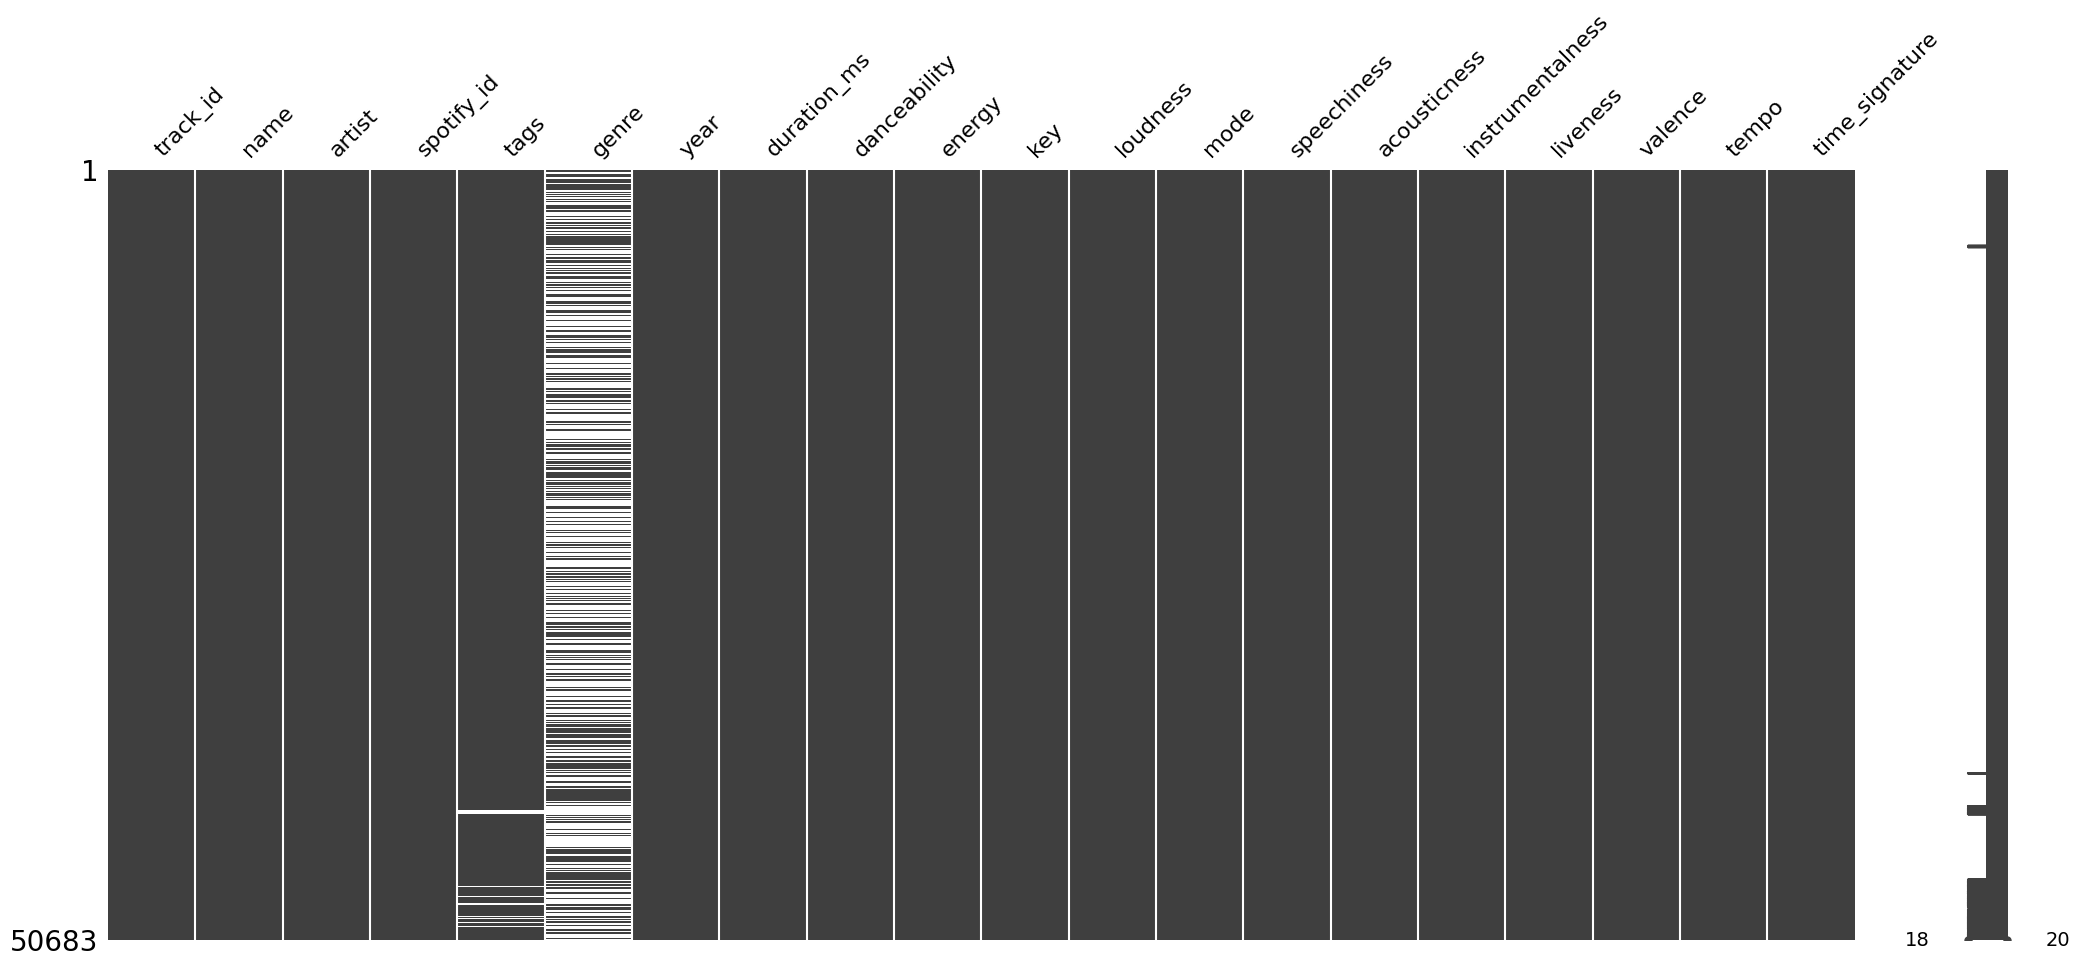

In [12]:
import missingno as msno

msno.matrix(df_songs)

In [13]:
# ratio of missing values in data

(
    df_songs
    .isna()
    .mean()
    .sort_values(ascending=False)
    .head(2)
    .mul(100)
)

,0
genre,55.906320
tags,2.223625


Duplicates

In [14]:
# check for duplicates
(
    df_songs
    .assign(name=df_songs["name"].str.lower())
    .duplicated(subset="name")
    .sum()
)

np.int64(815)

In [15]:
# duplicated rows
(
    df_songs
    .loc[
        df_songs
        .assign(name=df_songs["name"].str.lower())
        .duplicated(subset="name", keep=False)
    ]
    .assign(name=df_songs["name"].str.lower())
    .sort_values("name")
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
34480,TRKKZMK128F4257579,3 am,Liv Kristine,1TgsnkiolcBhQssCR37JXx,"female_vocalists, power_metal, gothic_metal, g...",NaN,2005,302880,0.516,0.840,0,-6.038,0,0.0390,0.152000,0.005970,0.107,0.441,78.009,4
6588,TRGGALK12903CB68E5,3 am,Matchbox Twenty,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, pop, alternative_rock, 90s,...",NaN,1996,225946,0.521,0.673,8,-8.685,1,0.0284,0.005730,0.000000,0.120,0.543,108.031,4
29795,TRLOXMF128F934BF04,3am,Matchbox Twenty,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, 90s, piano, american, pop_rock",NaN,1996,225946,0.521,0.673,8,-8.685,1,0.0284,0.005730,0.000000,0.120,0.543,108.031,4
43800,TRPWOAS128E0781045,3am,Halsey,1OfLNb6dQ9dra1B58iT9Ex,pop_rock,NaN,2020,234858,0.385,0.871,0,-4.604,0,0.0795,0.009060,0.000000,0.579,0.538,189.760,4
15088,TRJRBRX128F4255789,4th of july,Soundgarden,237oH9rNUYpIBeHfAn3WJ0,"hard_rock, 90s, grunge",NaN,1994,308866,0.368,0.749,5,-5.523,0,0.0392,0.109000,0.000372,0.175,0.193,141.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34772,TRJFGYO128F4259743,you're the one that i want,Lo-Fang,1dEHQktvcM8vCCyI1x7yVB,"indie, male_vocalists, cover",NaN,2014,204706,0.445,0.309,11,-12.517,0,0.0404,0.643000,0.000369,0.224,0.153,119.754,4
32677,TRFZYLL128F146902A,you've really got a hold on me,Smokey Robinson and The Miracles,03AkIZeRvGpTvDF9vNJtdj,"soul, 60s, oldies",Rock,2012,179513,0.674,0.515,0,-6.895,1,0.0296,0.724000,0.000000,0.339,0.596,116.678,3
20976,TRUXHGS128F145E41A,you've really got a hold on me,The Miracles,01FtGX94CSvO5Zxs5B6AMM,"soul, 60s, oldies",NaN,1994,180266,0.679,0.406,0,-10.533,1,0.0312,0.755000,0.000000,0.412,0.511,117.940,3
27680,TRXWPMW12903CB42A0,zombies,Childish Gambino,73kAUSAht4YOR7xNPmNb2L,funk,NaN,2016,281813,0.653,0.411,0,-11.986,1,0.1270,0.503000,0.000969,0.067,0.468,160.055,4


In [16]:
# duplicates in the data based on spotify_id

(
    df_songs
    .duplicated(subset="spotify_id")
    .sum()
)

np.int64(9)

In [17]:
# duplicated data

(
    df_songs
    .duplicated(subset=["spotify_id","year","duration_ms"])
    .sum()
)

np.int64(9)

In [18]:
# rows that have duplicated data
(
    df_songs
    .loc[
            df_songs
    .duplicated(subset=["spotify_id","year","duration_ms"], keep=False)
    ]
    .sort_values(["spotify_id","year","duration_ms"])
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15326,TRJNHPN128F92EF139,Adagio For Strings,Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,"instrumental, classical, soundtrack, beautiful",NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
21570,TRLSRQD128F426CFF8,"Adagio for Strings, Op. 11",Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,classical,NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
14861,TRLOZQZ128F92E8A3F,How Do You Want It,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop",NaN,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
14981,TRXHJQY128F42B5094,How Do U Want It,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop, american",Rap,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
37040,TRGCZFO128F92EE221,Je pense à toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,"alternative, beautiful, french",NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
49162,TRZBNQU128F148C04F,Je Pense A Toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,NaN,NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
13427,TRJQFIT128E0781CED,Too Much Too Young,The Specials,0ndKJL8gA4zLl317M7vndn,"punk, 80s, new_wave, reggae, ska",NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
46512,TRDTUTO128F422F138,Too Much Too Young (Live),The Specials,0ndKJL8gA4zLl317M7vndn,ska,NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
1684,TRRZUGN128F42A1EEE,There There,Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",Rock,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4
2983,TRXFHCL128F92E0989,"There, There",Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",NaN,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4


In [19]:
# drop duplicates

df_songs.drop_duplicates(subset=["spotify_id","year","duration_ms"], inplace=True)

In [20]:
# check for duplicates
(
    df_songs
    .duplicated(subset=["spotify_id","year","duration_ms"])
    .sum()
)

np.int64(0)

Column Wise Analysis

In [21]:
df_songs.columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [22]:
df_songs.dtypes

,0
track_id,object
name,object
artist,object
spotify_id,object
tags,object
genre,object
year,int64
duration_ms,int64
danceability,float64
energy,float64


In [23]:
# categorical columns

categorical_features = df_songs.select_dtypes(include="object").columns
categorical_features

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre'], dtype='object')

In [24]:
def categorical_analysis(df, feature_name,k_artists=15):
  for feature in feature_name:
    print(f"Number of categories in column {feature} are ", df[feature].str.lower().nunique())

    if feature in ["artist","genre"]:
      print(df[feature].value_counts().head(k_artists))

    if feature == "genre":
      print(f"The unique categories in {feature} column are: ", df[feature].dropna().unique())

    print("#"*75)

In [25]:
categorical_analysis(df_songs, categorical_features)

Number of categories in column track_id are  50674
###########################################################################
Number of categories in column name are  49860
###########################################################################
Number of categories in column artist are  8317
artist
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Iron Maiden            76
In Flames              76
Elliott Smith          76
Mogwai                 75
Boards of Canada       75
Name: count, dtype: int64
###########################################################################
Number of categories in column spotify_id are  50674
###########################################################################
Number of categories in column tags are  20054
###########################

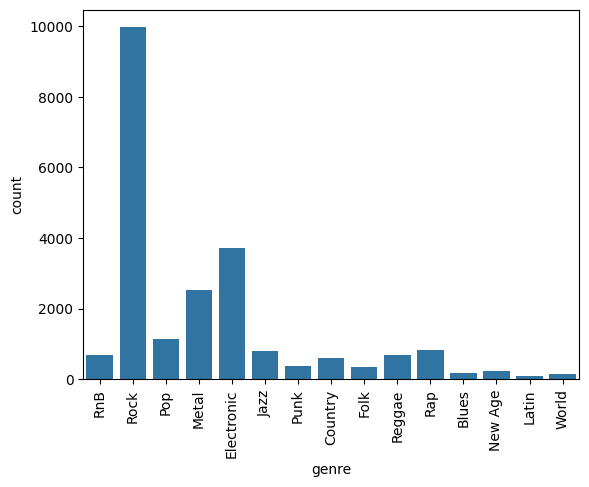

In [26]:
# countplot of genre

sns.countplot(df_songs, x="genre")
plt.xticks(rotation=90)
plt.show()

In [27]:
# genre group

genre_group = df_songs.groupby("genre")
genre_group[["genre","tags"]].sample(3)

,genre,tags
44354,Blues,"blues, blues_rock"
17744,Blues,"electronic, 80s, new_wave, synthpop"
13723,Blues,"punk, emo"
33307,Country,country
33701,Country,country
27675,Country,"hip_hop, funk"
48751,Electronic,"electronic, synthpop"
3630,Electronic,"electronic, indie, chillout, love, beautiful, ..."
32263,Electronic,"electronic, female_vocalists, electro"
27729,Folk,"alternative, funk, reggae, ska"


In [28]:
#  song titles in the data that are not in english

(
    df_songs
    .loc[
        df_songs
        .loc[:,"name"]
        .str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")
    ]
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2455,TRBGIZH128F4252D9E,2 + 2 = 5,Radiohead,0dUSgj5UiJHY92RCuEFYcx,"rock, electronic, alternative, indie, alternat...",Rock,2008,199360,0.443,0.717,5,-5.498,0,0.0504,0.182000,0.000051,0.3450,0.3860,149.582,4
4463,TRGHMRU128F1478067,"I Put The ""Metro"" In Metronome",Cute Is What We Aim For,718VxOgHaLU7oGS9686hg6,"alternative, emo",Rock,2006,206053,0.538,0.858,11,-3.862,1,0.0638,0.085200,0.000000,0.2580,0.7060,149.971,4
6870,TRGIILN12903CE46BB,1+1,Beyoncé,0b4bcwV5QWTzgza5u1gh5C,"female_vocalists, soul, rnb, beautiful",NaN,2011,273880,0.303,0.384,6,-7.342,1,0.0339,0.381000,0.000005,0.0661,0.2610,63.345,5
7902,TRZMLSV128F9305C8C,B********,Rammstein,2fKyVXrtvFkqv5lVPf1UXa,"metal, industrial, german",Rock,2009,254013,0.352,0.905,9,-3.792,1,0.0836,0.000895,0.218000,0.1810,0.3270,141.016,3
7974,TRFRAEO128F4279C87,F**k the System,System of a Down,0uvPnGOwcaUNT6gwJF98wL,"metal, nu_metal",Metal,2002,132733,0.474,0.994,8,-1.884,1,0.1030,0.002160,0.126000,0.3140,0.8470,171.433,4
10722,TRODWHD128F92FD8BA,4 + 20,"Crosby, Stills, Nash & Young",2jZPEeW2ynykb2GkVqpOkJ,"rock, classic_rock, folk, singer_songwriter, a...",Rock,1970,126640,0.638,0.058,4,-25.243,1,0.0388,0.928000,0.079000,0.1130,0.1260,140.964,4
13127,TRLMIXB128EF3435DD,M+M's,blink-182,0z6VQdAqi0HjQYULMUYpBt,"punk, punk_rock",NaN,2005,155680,0.212,0.921,9,-6.092,1,0.0567,0.000054,0.003990,0.0669,0.6800,159.629,4
14454,TRKEIVB128F930A597,"Nuthin' But a ""G"" Thang",Dr. Dre,1qaZx6y94LiMy2KdhHxRTy,"rap, 90s, hip_hop",NaN,2005,230026,0.817,0.704,7,-8.336,1,0.2850,0.009390,0.000000,0.0850,0.6800,94.627,4
17862,TRBZLOG12903CB78FD,I Belong To You [+Mon Coeur S'Ouvre A Ta Voix],Muse,114rzL6VEy9bb3amPcY3tw,"rock, alternative_rock, progressive_rock, soun...",Rock,2009,338813,0.481,0.603,2,-6.590,1,0.0280,0.166000,0.032100,0.1090,0.2130,105.974,4
22541,TRYVOPZ128F4254176,£4,These New Puritans,1LsQ5WkLU8ubiAz6AtMNll,"electronic, alternative, british, industrial, ...",Rock,2008,133173,0.692,0.759,11,-9.216,1,0.0533,0.052200,0.012900,0.4630,0.2560,99.988,4


In [29]:
df_songs["tags"][0]

'rock, alternative, indie, alternative_rock, indie_rock, 00s'

In [30]:
all_tags = []

for tags in df_songs["tags"].dropna().str.replace(" ","").str.split(","):
  all_tags.extend(tags)

In [31]:
len(set(all_tags))

100

In [32]:
# same code but with pandas

(
    df_songs
    .loc[:,"tags"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .nunique()
)

100

Integer based Columns

In [33]:
integer_columns = df_songs.select_dtypes(include="int").columns
integer_columns

Index(['year', 'duration_ms', 'key', 'mode', 'time_signature'], dtype='object')

In [34]:
df_songs[integer_columns]

,year,duration_ms,key,mode,time_signature
0,2004,222200,1,1,4
1,2006,258613,2,1,4
2,1991,218920,4,0,4
3,2004,237026,9,1,4
4,2008,238640,7,1,4
...,...,...,...,...,...
50678,2008,273440,6,0,4
50679,2004,275133,0,1,4
50680,2014,254826,10,0,4
50681,2008,243293,4,0,4


In [35]:
# statistical summary
(
    df_songs.loc[:,integer_columns]
    .drop(columns=["duration_ms"])
    .assign(**{
        col : df_songs[col].astype("object")
        for col in integer_columns.drop("duration_ms")
    })
).describe()

,year,key,mode,time_signature
count,50674,50674,50674,50674
unique,75,12,2,5
top,2007,9,1,4
freq,4221,5907,31979,44981


In [36]:
# range of data

(
    df_songs
    .loc[:,integer_columns]
    .assign(duration_minutes = df_songs["duration_ms"].div(1000).div(60))
    .drop(columns=["duration_ms"])
    .agg(["min","max"])
)

,year,key,mode,time_signature,duration_minutes
min,1900,0,0,0,0.023983
max,2022,11,1,5,63.606217


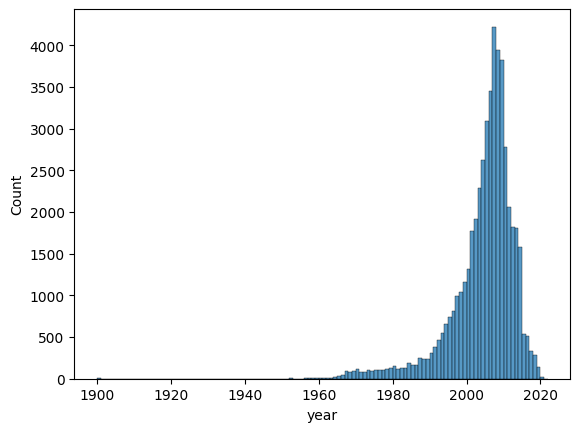

In [37]:
# number of songs per year in the data

sns.histplot(df_songs, x="year",bins=df_songs["year"].max() - df_songs["year"].min(),stat="count")
plt.show()

In [38]:
# most songs from which year (top 5)

(
    df_songs
    .loc[:,"year"]
    .value_counts()
    .head(5)
    .sort_index()
)



,count
year,
2005,3085
2006,3453
2007,4221
2008,3947
2009,3827


In [39]:
# unique values in the key column

(
    np.sort(
        df_songs
        .loc[:,"key"]
        .unique()
    )
)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

<Axes: title={'center': 'Percentage of songs w.r.t key'}, xlabel='Percentage', ylabel='key'>

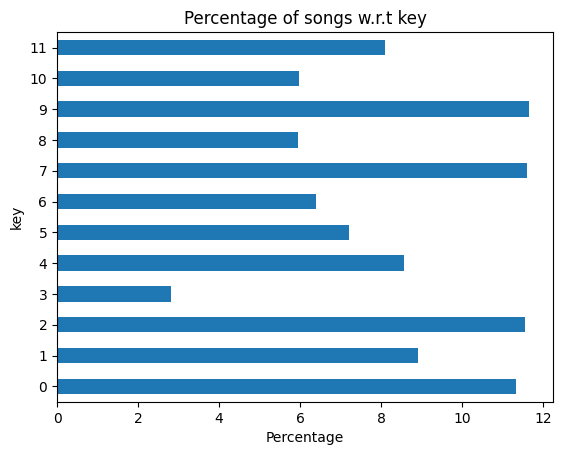

In [40]:
# percentage of songs w.r.t key in the data

(
    df_songs["key"]
    .value_counts(normalize=True)
    .mul(100)
    .sort_index()
    .plot(kind="barh", title= "Percentage of songs w.r.t key", xlabel="Percentage")
)

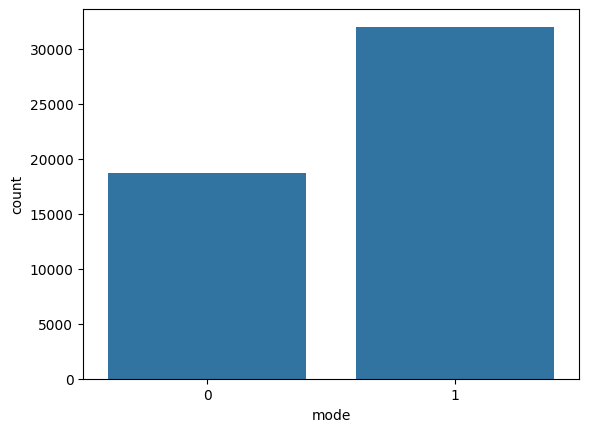

In [41]:
# countplot fr mode

sns.countplot(df_songs, x="mode")
plt.show()

In [42]:
# time signature unique values

(
    df_songs["time_signature"]
    .unique()
)

array([4, 3, 5, 1, 0])

In [43]:
# distribution

(
    df_songs["time_signature"]
    .value_counts(normalize=True)
    .mul(100)
)

,proportion
time_signature,
4,88.765442
3,8.880294
5,1.444528
1,0.890003
0,0.019734


In [44]:
# statistical summary for time duration

(
    df_songs
    .loc[:,["duration_ms"]]
    .assign(duration_minutes = df_songs["duration_ms"].div(1000).div(60))
    .drop(columns="duration_ms")
    .describe()
)

,duration_minutes
count,50674.000000
mean,4.185893
std,1.793154
min,0.023983
25%,3.212217
50%,3.915550
75%,4.803046
max,63.606217


<Axes: xlabel='time_signature', ylabel='count'>

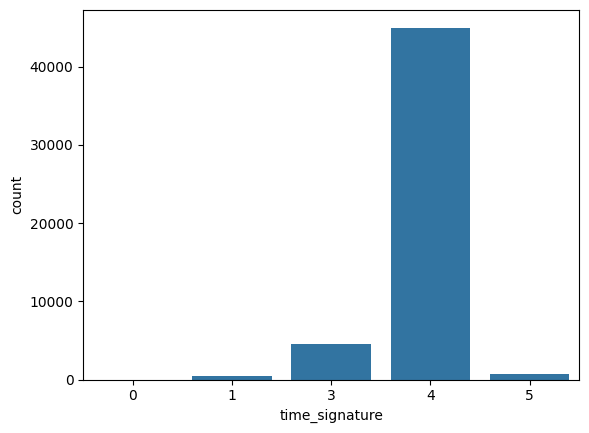

In [45]:
sns.countplot(df_songs,x = "time_signature")

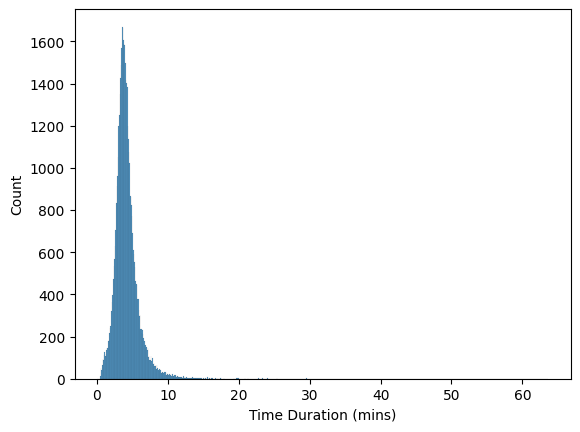

In [46]:
# time duration histogram

time_duration_mins = df_songs["duration_ms"].div(1000).div(60)

sns.histplot(time_duration_mins)
plt.xlabel("Time Duration (mins)")
plt.show()

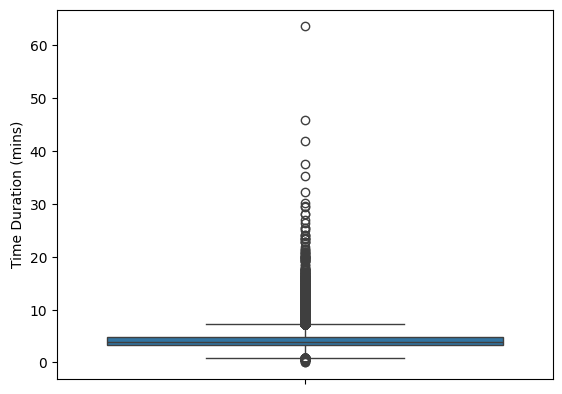

In [47]:
sns.boxplot(time_duration_mins)
plt.ylabel("Time Duration (mins)")
plt.show()

In [48]:
# song that is longer than 60 minutes

(
    df_songs
     .loc[time_duration_mins > 60]
)


,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
25337,TRDAOJL128F932C383,Dopesmoker,Sleep,1vhvheW4R0KbK6Kr3NFplW,"psychedelic, doom_metal",NaN,2003,3816373,0.16,0.572,5,-6.949,1,0.0321,0.00367,0.745,0.0952,0.0932,96.926,4


Continuous Data

In [49]:
continuous_columns = df_songs.select_dtypes(include="float").columns
continuous_columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [53]:
def numerical_analysis(df,columns):

  for column in columns:
    print(f"Numerical Analysis for column {column}")
    print("Statistical Summary")
    print(df[column].describe())

    fig = plt.figure(figsize=(12,4))
    # histogram for column
    plt.subplot(1,2,1)
    sns.histplot(df[column])
    plt.title(f"Histogram for {column}")

    # boxplo for column
    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

    print('#'*120)

  print("*"*120)
  print("Pairplot")
  sns.pairplot(df[columns])
  plt.show()

In [54]:
numerical_analysis(df_songs,continuous_columns)

Output hidden; open in https://colab.research.google.com to view.

User Data

In [55]:
df_users = pd.read_csv(user_data_path)
df_users.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [56]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


In [58]:
# check for duplicates

df_users.duplicated(subset=["track_id","user_id"]).sum()

np.int64(0)

In [59]:
# mising values

df_users.isna().sum()

,0
track_id,0
user_id,0
playcount,0


In [60]:
# unique users in the data

(
    df_users["user_id"]
    .nunique()
)

962037

In [61]:
# unique songs in the data

(
    df_users["track_id"]
    .nunique()
)

30459

In [64]:
# top 10 most played songs int user data

top_10_songs = (
    df_users["track_id"]
    .value_counts()
    .head(10)
)
top_10_songs

,count
track_id,
TRONYHY128F92C9D11,80656
TRUFTBY128F93450B8,39529
TRXWAZC128F9314B3E,30873
TRCPXID128F92D5D3C,30057
TRGCHLH12903CB7352,29708
TROMKCG128F9320C09,28735
TRPFYYL128F92F7144,28412
TRPGPDK12903CCC651,27276
TRWAQOC12903CB84CA,27222


In [65]:
(
    df_songs[
        df_songs["track_id"]
        .isin(top_10_songs.index.tolist())
    ]
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
44,TRAALAH128E078234A,Bitter Sweet Symphony,The Verve,0jLnevC3Vn34qVWrAa4X6x,"rock, alternative, indie, pop, alternative_roc...",NaN,1999,358333,0.383,0.907,9,-5.409,1,0.0405,0.031300,0.000000,0.3470,0.514,171.052,4
59,TRPFYYL128F92F7144,Float On,Modest Mouse,1Urf1M52P3R6NYdAOJizoW,"rock, alternative, indie, alternative_rock, in...",Rock,2004,208466,0.646,0.893,6,-4.799,1,0.0301,0.015100,0.000004,0.0892,0.559,100.951,4
323,TRONYHY128F92C9D11,Revelry,Kings of Leon,039Q3UlFQ6kavVIZHpO4mL,"rock, alternative, indie, alternative_rock, in...",Rock,2008,201733,0.437,0.748,4,-6.593,1,0.0689,0.196000,0.000328,0.1580,0.383,149.834,4
1876,TRXWAZC128F9314B3E,Heartbreak Warfare,John Mayer,0naTARZScsZOtx3nlhlq0Y,"rock, alternative, indie, pop, singer_songwrit...",Rock,2010,263280,0.626,0.572,2,-7.989,1,0.0228,0.197000,0.000497,0.2720,0.297,97.081,4
2107,TRUFTBY128F93450B8,Alejandro,Lady Gaga,0CXHrBetrvDx4PwBar1ZWj,"electronic, pop, female_vocalists, dance",Pop,2010,274800,0.626,0.800,11,-6.777,0,0.0435,0.000582,0.001140,0.3740,0.353,98.995,4
2742,TRCPXID128F92D5D3C,Halo,Depeche Mode,0Ti7ZxvgWq74Ls56vYP3Ov,"electronic, pop, 80s, british, 90s, new_wave, ...",NaN,1990,270160,0.672,0.508,3,-12.620,0,0.0310,0.052800,0.067100,0.0801,0.741,112.184,4
3168,TRWAQOC12903CB84CA,Sexy Bitch,David Guetta,01N6xy2PX9fKVfrA2YOkYd,"electronic, dance, house",NaN,2009,193800,0.810,0.595,11,-5.812,0,0.0579,0.067300,0.000764,0.1190,0.813,130.018,4
19724,TROMKCG128F9320C09,Uprising,Sabaton,09tHVoXbJNZUotndn8pfJr,"metal, heavy_metal, power_metal",NaN,2010,295640,0.527,0.866,6,-3.763,0,0.0346,0.009910,0.000052,0.1290,0.428,87.986,4
22071,TRPGPDK12903CCC651,Bring Me To Life,Katherine Jenkins,0rJ8HF2zsxsWMzirj3YFQR,"classical, cover, new_age",Rock,2012,226093,0.429,0.563,4,-8.006,0,0.0300,0.881000,0.000097,0.0760,0.298,95.989,4
23220,TRGCHLH12903CB7352,Party In The U.S.A.,The Barden Bellas,0bz2Uy1KE7bNGsGQU9pZrU,"soundtrack, cover",Pop,2012,63080,0.531,0.360,10,-8.575,0,0.1080,0.822000,0.000000,0.1780,0.701,97.200,4


In [67]:
# most playcounts for songs

top_10_played_songs = (
    df_users.groupby("track_id")["playcount"]
    .agg("sum")
    .sort_values(ascending=False)
    .head(10)
)
top_10_played_songs

,playcount
track_id,
TRONYHY128F92C9D11,527893
TRUFTBY128F93450B8,111615
TRZNAHL128F9327D5A,111596
TRCPXID128F92D5D3C,91461
TRPGPDK12903CCC651,91448
TRXWAZC128F9314B3E,87745
TROMKCG128F9320C09,87050
TRPFYYL128F92F7144,85079
TRGCHLH12903CB7352,78443


In [68]:
pd.concat([top_10_songs, top_10_played_songs],axis=1)

,count,playcount
track_id,,
TRONYHY128F92C9D11,80656.0,527893.0
TRUFTBY128F93450B8,39529.0,111615.0
TRXWAZC128F9314B3E,30873.0,87745.0
TRCPXID128F92D5D3C,30057.0,91461.0
TRGCHLH12903CB7352,29708.0,78443.0
TROMKCG128F9320C09,28735.0,87050.0
TRPFYYL128F92F7144,28412.0,85079.0
TRPGPDK12903CCC651,27276.0,91448.0
TRWAQOC12903CB84CA,27222.0,NaN


In [69]:
# most diverse users

most_diverse_users = (
    df_users.groupby("user_id")["track_id"]
    .agg("count")
    .sort_values(ascending=False)
    .head(10)
)
most_diverse_users

,track_id
user_id,
ec6dfcf19485cb011e0b22637075037aae34cf26,784
4e11f45d732f4861772b2906f81a7d384552ad12,384
726da71c2c2ea119119a7957517fccd028d1be76,376
113255a012b2affeab62607563d03fbdf31b08e7,367
7adec7f006cb09482d36609d205293d8b61f030e,366
fef771ab021c200187a419f5e55311390f850a50,363
8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,362
b4c94d72b15d3c311c10045a58b31f95d9d12785,357
96f7b4f800cafef33eae71a6bc44f7139f63cd7a,356


In [71]:
# most playcounts for users

most_active_users = (
    df_users.groupby("user_id")["playcount"]
    .agg("sum")
    .sort_values(ascending=False)
    .head(10)
)
most_active_users

,playcount
user_id,
1854daf178674bbac9a8ed3d481f95b76676b414,2953
944cdf52364f45b0edd1c972b5a73d3a86b09c6a,2046
6a8a142084a4818c0dcac48bdfb3c39deacf5168,1942
93158e3983ffc8945e25c793d93d6b67d46cae9d,1845
f0b5c784daaa3c7d50acbb3723c7dd649db2b231,1841
6a58f480d522814c087fd3f8c77b3f32bb161f9d,1783
49127655d27dabab3f469bcdd996330fe4f3e210,1743
3fa44653315697f42410a30cb766a4eb102080bb,1639
839223f11c98e0c8017e8ecd6fc7b8706658c966,1608


In [72]:
pd.concat([most_diverse_users, most_active_users], axis=1)

,track_id,playcount
user_id,,
ec6dfcf19485cb011e0b22637075037aae34cf26,784.0,NaN
4e11f45d732f4861772b2906f81a7d384552ad12,384.0,NaN
726da71c2c2ea119119a7957517fccd028d1be76,376.0,NaN
113255a012b2affeab62607563d03fbdf31b08e7,367.0,NaN
7adec7f006cb09482d36609d205293d8b61f030e,366.0,NaN
fef771ab021c200187a419f5e55311390f850a50,363.0,NaN
8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,362.0,NaN
b4c94d72b15d3c311c10045a58b31f95d9d12785,357.0,NaN
96f7b4f800cafef33eae71a6bc44f7139f63cd7a,356.0,NaN
